In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#adding some code data feature engineering
# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Data Manipulation
import pandas as pd
import numpy as np

# Date and Time
from datetime import datetime

# Additional visualization (not direct equivalents, but useful)
from scipy.stats import gaussian_kde





In [3]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

def multiplot(plots, cols=1, layout=None):
    num_plots = len(plots)

    if layout is None:
        rows = -(-num_plots // cols)  # Ceiling division
        layout = (rows, cols)

    fig = plt.figure(figsize=(cols * 4, rows * 4))  # Adjust figure size as needed
    gs = gridspec.GridSpec(*layout)

    for i, plot in enumerate(plots):
        row, col = divmod(i, cols)
        ax = fig.add_subplot(gs[row, col])
        plot(ax)  # Assuming each plot is a function that takes an Axes object

    plt.tight_layout()
    plt.show()



In [4]:
pip install statsmodels


^C
Note: you may need to restart the kernel to use updated packages.


In [5]:
import statsmodels.stats.proportion as smp

def get_binCI(x, n, confidence_level=0.95):
    """
    Function to calculate the binomial confidence interval.

    :param x: Number of successes.
    :param n: Number of trials.
    :param confidence_level: Confidence level for the interval. Default is 0.95.
    :return: A dictionary with lower and upper confidence interval bounds.
    """
    lower, upper = smp.proportion_confint(count=x, nobs=n, alpha=(1 - confidence_level), method='normal')
    return {'lwr': lower, 'upr': upper}


In [46]:
pip install pandas


In [51]:
import pandas as pd

members = pd.read_csv('/content/drive/MyDrive/DATA MINING /members.csv')
# test = pd.read_csv('../input/sample_submission.csv')
trans = pd.read_csv('/content/drive/MyDrive/DATA MINING /transactions.csv', nrows=5000)
logs = pd.read_csv('/content/drive/MyDrive/DATA MINING /user_logs.csv', nrows=5000)
churn = pd.read_csv('/content/drive/MyDrive/DATA MINING /is_churn.csv', nrows=5000)


In [54]:
print(members.head())
# print(test.head())  # Uncomment if needed


                                           msno  city  bd gender  \
0  vcXU+0HJiJPRmQaBYUrmCmj64rIluNGYy5uGYK5jtmw=     4  21   male   
1  Xj46RMUpTjv8IQq5TdDoifHw4WwHbXCnDc1QqL0KFlo=     4  29   male   
2  sH1QH54J0ytNyLo4AITcozT9RBORbk0fpVjgLNmLZiI=     4  23   male   
3  9eoVMtsXwWvmDtvBHzLTV5gegf59sdeuTvdbhnl77nk=     1   0    NaN   
4  FytYRDc6RPMESLcVIea5WNCZ6qi9axDsSthI42w6Gd0=     1   0    NaN   

   registered_via  registration_init_time  
0               9                20070309  
1               9                20140403  
2               3                20141210  
3              13                20161227  
4               7                20170123  


In [55]:
print(trans.head())


                                           msno  payment_method_id  \
0  pytvLjmKj7HrcmrYFcTagnrf+phi8rfiuHRoRemWhqY=                 41   
1  pytvLjmKj7HrcmrYFcTagnrf+phi8rfiuHRoRemWhqY=                 41   
2  pytvLjmKj7HrcmrYFcTagnrf+phi8rfiuHRoRemWhqY=                 41   
3  pytvLjmKj7HrcmrYFcTagnrf+phi8rfiuHRoRemWhqY=                 41   
4  pytvLjmKj7HrcmrYFcTagnrf+phi8rfiuHRoRemWhqY=                 41   

   payment_plan_days  plan_list_price  actual_amount_paid  is_auto_renew  \
0                 30               99                  99              1   
1                 30               99                  99              1   
2                 30               99                  99              1   
3                 30               99                  99              1   
4                 30               99                  99              1   

   transaction_date  membership_expire_date  is_cancel  
0          20160822                20160922          0  
1       

In [56]:
print(logs.head())
#print(churn.head())


                                           msno      date  num_25  num_50  \
0  S2T6jI9T0Co0vOUpzrIMTTSwq21nq2Qjsaxb9HeGIUc=  20150201       0       1   
1  S2T6jI9T0Co0vOUpzrIMTTSwq21nq2Qjsaxb9HeGIUc=  20150329       2       0   
2  S2T6jI9T0Co0vOUpzrIMTTSwq21nq2Qjsaxb9HeGIUc=  20150524       3       8   
3  S2T6jI9T0Co0vOUpzrIMTTSwq21nq2Qjsaxb9HeGIUc=  20150716       3       0   
4  S2T6jI9T0Co0vOUpzrIMTTSwq21nq2Qjsaxb9HeGIUc=  20150930       1       1   

   num_75  num_985  num_100  num_unq  total_secs  
0       0        1       41       20   10920.526  
1       0        1       42       37   10944.409  
2       1        1      100       64   25880.440  
3       1        0        6       10    1596.681  
4       1        1       26       24    7351.039  


In [58]:
members.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4407 entries, 0 to 4406
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   msno                    4407 non-null   object
 1   city                    4407 non-null   int64 
 2   bd                      4407 non-null   int64 
 3   gender                  1946 non-null   object
 4   registered_via          4407 non-null   int64 
 5   registration_init_time  4407 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 206.7+ KB


In [59]:
# test.info()  # Uncomment if needed
trans.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   msno                    5000 non-null   object
 1   payment_method_id       5000 non-null   int64 
 2   payment_plan_days       5000 non-null   int64 
 3   plan_list_price         5000 non-null   int64 
 4   actual_amount_paid      5000 non-null   int64 
 5   is_auto_renew           5000 non-null   int64 
 6   transaction_date        5000 non-null   int64 
 7   membership_expire_date  5000 non-null   int64 
 8   is_cancel               5000 non-null   int64 
dtypes: int64(8), object(1)
memory usage: 351.7+ KB


In [60]:
# test.info()  # Uncomment if needed
logs.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   msno        5000 non-null   object 
 1   date        5000 non-null   int64  
 2   num_25      5000 non-null   int64  
 3   num_50      5000 non-null   int64  
 4   num_75      5000 non-null   int64  
 5   num_985     5000 non-null   int64  
 6   num_100     5000 non-null   int64  
 7   num_unq     5000 non-null   int64  
 8   total_secs  5000 non-null   float64
dtypes: float64(1), int64(7), object(1)
memory usage: 351.7+ KB


In [67]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4964 entries, 0 to 4963
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   msno      4964 non-null   object
 1   is_churn  4964 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 77.7+ KB


In [61]:
print(members.describe())
# print(test.describe())  # Uncomment if needed



              city           bd  registered_via  registration_init_time
count  4407.000000  4407.000000     4407.000000            4.407000e+03
mean      5.894940    13.237803        6.916043            2.013276e+07
std       6.427259    16.059911        1.905206            2.932067e+04
min       1.000000   -42.000000        3.000000            2.004033e+07
25%       1.000000     0.000000        7.000000            2.012031e+07
50%       1.000000     0.000000        7.000000            2.014060e+07
75%      13.000000    27.000000        9.000000            2.016011e+07
max      22.000000   117.000000       13.000000            2.017021e+07


In [62]:
print(trans.describe())


       payment_method_id  payment_plan_days  plan_list_price  \
count        5000.000000         5000.00000      5000.000000   
mean           38.911000           28.78820       130.852000   
std             3.983849           10.08046        50.386878   
min            14.000000            0.00000         0.000000   
25%            38.000000           30.00000        99.000000   
50%            41.000000           30.00000       149.000000   
75%            41.000000           30.00000       149.000000   
max            41.000000          410.00000      1788.000000   

       actual_amount_paid  is_auto_renew  transaction_date  \
count         5000.000000     5000.00000      5.000000e+03   
mean           137.015000        0.94020      2.015773e+07   
std             41.720984        0.23714      6.140918e+03   
min              0.000000        0.00000      2.015010e+07   
25%            129.000000        1.00000      2.015092e+07   
50%            149.000000        1.00000      2.016

In [63]:
print(logs.describe())


               date       num_25       num_50       num_75      num_985  \
count  5.000000e+03  5000.000000  5000.000000  5000.000000  5000.000000   
mean   2.015857e+07     6.352200     1.604800     1.003200     0.928800   
std    6.095390e+03    11.227616     3.240234     1.933892     1.602699   
min    2.015010e+07     0.000000     0.000000     0.000000     0.000000   
25%    2.015110e+07     0.000000     0.000000     0.000000     0.000000   
50%    2.016051e+07     2.000000     1.000000     0.000000     0.000000   
75%    2.016101e+07     7.000000     2.000000     1.000000     1.000000   
max    2.017023e+07   212.000000    47.000000    48.000000    39.000000   

           num_100      num_unq    total_secs  
count  5000.000000  5000.000000   5000.000000  
mean     28.242800    28.433800   7371.679701  
std      30.457357    28.035799   7711.519727  
min       0.000000     1.000000      1.466000  
25%       7.000000    10.000000   2097.765250  
50%      17.000000    20.000000   45

In [66]:
print(churn.describe())

          is_churn
count  4964.000000
mean      0.063860
std       0.244528
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000


In [ ]:
# reference: https://www.kaggle.com/code/headsortails/should-i-stay-or-should-i-go-kkbox-eda

In [6]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

Load datasets from Google drives

In [7]:
is_churn_url = 'https://drive.google.com/file/d/1P43072y7KI4RUOKgWzZc3ov8kMaFQMVA/view?usp=sharing'
is_churn_url = 'https://drive.google.com/uc?id=' + is_churn_url.split('/')[-2]

# is_churn_url = 'is_churn.csv'
is_churn_df = pd.read_csv(is_churn_url)

# print(is_churn_df)

In [8]:
transactions_url = 'https://drive.google.com/file/d/1oPbL4uWPtFvq41IqNfMNW7QUaGA3INXV/view?usp=sharing'
transactions_url = 'https://drive.google.com/uc?id=' + transactions_url.split('/')[-2]
# transactions_url = 'transactions.csv'
transactions_df = pd.read_csv(transactions_url)

# print(transactions_df)

In [9]:
user_logs_url = 'https://drive.google.com/file/d/1FNMohIsfIcBFs2V-0m43qYoIGP1gCLQe/view?usp=sharing'
user_logs_url = 'https://drive.google.com/uc?id=' + user_logs_url.split('/')[-2]

user_logs_df = pd.read_csv(user_logs_url)

# print(user_logs_df)

In [10]:
members_url = 'https://drive.google.com/file/d/1yWY0mrpyEU3Ug98H8JsbQ-esROu5L5X6/view?usp=sharing'
members_url = 'https://drive.google.com/uc?id=' + members_url.split('/')[-2]

# members_path = 'members.csv'
members_df = pd.read_csv(members_url)

# print(members_df)

Merge four datasets into a large dataset

In [11]:
# count the average playtime per day for every member

avg_playtime = user_logs_df.groupby('msno', as_index=False)['total_secs'].mean()
avg_playtime = avg_playtime.rename(columns={"total_secs": "playtime_per_day"})
print(avg_playtime.min())

msno                ++LEgyw4z5zuPu61SoBhMicDimkV+A9kPbcMaQgC/7c=
playtime_per_day                            -320255973495365.125
dtype: object


In [12]:
# calculate the total length of membership plan in days

membership_days = transactions_df.groupby('msno', as_index=False)['payment_plan_days'].sum()
latest_transaction_date = transactions_df.groupby('msno', as_index=False)['transaction_date'].max()
latest_transactions = transactions_df.merge(latest_transaction_date, on=["msno", "transaction_date"])
# print(latest_transactions)

In [13]:
# merge all dataset

merged_data = is_churn_df.merge(avg_playtime, how='inner', on=["msno"]).merge(members_df, how='inner', on="msno").merge(latest_transactions, how='inner', on=["msno"])

print(merged_data)

                                              msno  is_churn  \
0     dEPT6Ki6RIimMvKFy2B/iLhNalAIQVvVEznJwqcI5xg=         0   
1     NZh6JkdKxv5+yzfxoJjDpqQqlxaWoLte6GoAUcD2RKs=         0   
2     MQJh0JzTYfSzdsOH/ice1rsxouzE/dRDFeI4MhA3mqA=         0   
3     TMBsL0a7IjM8dEC4Yg8lwbnZP52MJpiSLcvHNjesmSs=         0   
4     QH6WsEFO0cDNqAgBzuFoKdPbpaq27+StO4I/6ATGfXc=         0   
...                                            ...       ...   
4423  R+puA1IoFN9ZIBZINnLZivZEAW8jv47H6D0zPNeGlGc=         1   
4424  uDT8cz06dz2Hwv0DspKzjDPcP4izsPH6HZgd9EvEgGg=         1   
4425  2tfPyhPXlIGjqGMb+r/ZTmxeG/v0i28xY3xSn97gdOo=         1   
4426  TQvFyIQAcPI4qpzYoT9+b9dM9Odjnyw4ev3kOu1I5sI=         1   
4427  TQvFyIQAcPI4qpzYoT9+b9dM9Odjnyw4ev3kOu1I5sI=         1   

      playtime_per_day  city  bd  gender  registered_via  \
0         1.481261e+04    22  35    male               9   
1         1.446139e+03     1   0     NaN               7   
2         3.540335e+03     8  32  female           

In [14]:
# check missing values

merged_data.isna().sum(axis = 0)

msno                         0
is_churn                     0
playtime_per_day             0
city                         0
bd                           0
gender                    2471
registered_via               0
registration_init_time       0
payment_method_id            0
payment_plan_days            0
plan_list_price              0
actual_amount_paid           0
is_auto_renew                0
transaction_date             0
membership_expire_date       0
is_cancel                    0
dtype: int64

In [15]:
# Replace missing values in column 'gender' with integer -1

merged_data[['gender']] = merged_data[['gender']].fillna('-1')

In [16]:
# Convert registration_init_time, transaction_date, membership_expire_date to years

merged_data['registration_init_time'] = merged_data['registration_init_time'].astype(str).str[:4]
merged_data['transaction_date'] = merged_data['transaction_date'].astype(str).str[:4]
merged_data['membership_expire_date'] = merged_data['membership_expire_date'].astype(str).str[:4]

print(merged_data)

                                              msno  is_churn  \
0     dEPT6Ki6RIimMvKFy2B/iLhNalAIQVvVEznJwqcI5xg=         0   
1     NZh6JkdKxv5+yzfxoJjDpqQqlxaWoLte6GoAUcD2RKs=         0   
2     MQJh0JzTYfSzdsOH/ice1rsxouzE/dRDFeI4MhA3mqA=         0   
3     TMBsL0a7IjM8dEC4Yg8lwbnZP52MJpiSLcvHNjesmSs=         0   
4     QH6WsEFO0cDNqAgBzuFoKdPbpaq27+StO4I/6ATGfXc=         0   
...                                            ...       ...   
4423  R+puA1IoFN9ZIBZINnLZivZEAW8jv47H6D0zPNeGlGc=         1   
4424  uDT8cz06dz2Hwv0DspKzjDPcP4izsPH6HZgd9EvEgGg=         1   
4425  2tfPyhPXlIGjqGMb+r/ZTmxeG/v0i28xY3xSn97gdOo=         1   
4426  TQvFyIQAcPI4qpzYoT9+b9dM9Odjnyw4ev3kOu1I5sI=         1   
4427  TQvFyIQAcPI4qpzYoT9+b9dM9Odjnyw4ev3kOu1I5sI=         1   

      playtime_per_day  city  bd  gender  registered_via  \
0         1.481261e+04    22  35    male               9   
1         1.446139e+03     1   0      -1               7   
2         3.540335e+03     8  32  female           

In [17]:
# replacing values in column gender
merged_data['gender'].replace(['female', 'male'],
                        [0, 1], inplace=True)

In [18]:
merged_data.dtypes

msno                       object
is_churn                    int64
playtime_per_day          float64
city                        int64
bd                          int64
gender                     object
registered_via              int64
registration_init_time     object
payment_method_id           int64
payment_plan_days           int64
plan_list_price             int64
actual_amount_paid          int64
is_auto_renew               int64
transaction_date           object
membership_expire_date     object
is_cancel                   int64
dtype: object

In [19]:
# set row names (index) to the msno column

merged_data = merged_data.set_index('msno')

print(merged_data)

                                              is_churn  playtime_per_day  \
msno                                                                       
dEPT6Ki6RIimMvKFy2B/iLhNalAIQVvVEznJwqcI5xg=         0      1.481261e+04   
NZh6JkdKxv5+yzfxoJjDpqQqlxaWoLte6GoAUcD2RKs=         0      1.446139e+03   
MQJh0JzTYfSzdsOH/ice1rsxouzE/dRDFeI4MhA3mqA=         0      3.540335e+03   
TMBsL0a7IjM8dEC4Yg8lwbnZP52MJpiSLcvHNjesmSs=         0      2.101799e+03   
QH6WsEFO0cDNqAgBzuFoKdPbpaq27+StO4I/6ATGfXc=         0      2.693799e+04   
...                                                ...               ...   
R+puA1IoFN9ZIBZINnLZivZEAW8jv47H6D0zPNeGlGc=         1     -4.303284e+13   
uDT8cz06dz2Hwv0DspKzjDPcP4izsPH6HZgd9EvEgGg=         1      6.345836e+03   
2tfPyhPXlIGjqGMb+r/ZTmxeG/v0i28xY3xSn97gdOo=         1      6.386885e+03   
TQvFyIQAcPI4qpzYoT9+b9dM9Odjnyw4ev3kOu1I5sI=         1      6.546864e+03   
TQvFyIQAcPI4qpzYoT9+b9dM9Odjnyw4ev3kOu1I5sI=         1      6.546864e+03   

           

Split training and test data

In [20]:
# Identify features and target variable
X = merged_data.drop(['is_churn'], axis=1)
y = merged_data['is_churn']

yes_count = merged_data['is_churn'].value_counts().get(1, 0)
no_count = merged_data['is_churn'].value_counts().get(0, 0)
print(yes_count)
print(no_count)

306
4122


In [23]:
pip install imbalanced-learn


     -------------------------------------- 235.6/235.6 kB 7.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [24]:
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
# Combine X_train and y_train into a single DataFrame for undersampling
train_data = pd.concat([X_train, y_train], axis=1)

# Identify the minority class label
minority_class_label = train_data['is_churn'].value_counts().idxmin()

# Apply random undersampling on imbalanced target data
undersampler = RandomUnderSampler(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = undersampler.fit_resample(train_data.drop('is_churn', axis=1), train_data['is_churn'])
print(X_resampled)

                                              playtime_per_day  city  bd  \
msno                                                                       
fXIbo3doDl/oK7KPhIUlAIoPS+ZZev9mjpc7xfHA1fM=       3054.982949     1   0   
cK2PscBpXADun3kHkKjz8tDf6TeViSmnZpzpB5A2yAA=      21048.954481     8   0   
vNmOT0Ub6+GtH+rxTYG2SNdj3P+mXRuftTlHjGScGpM=       4645.567653     4  32   
8bQq9L3xAW4Zc+jnmUiWrNC/sgzeYviKX4sxC0xjqgQ=       3618.238833     1   0   
hQ9Z5imxSji1P9n2AEOrAxRXhlTI8A6HxFQqUUjD5hQ=       3619.656167     4  25   
...                                                        ...   ...  ..   
uDT8cz06dz2Hwv0DspKzjDPcP4izsPH6HZgd9EvEgGg=       6345.836411    17  17   
Wi9FVuWepMuned5EY76C3jFxTAlWZ9O7212Dtzb3+9s=       4254.758122     1   0   
ks6TN/5KhmCwcCbCsuuFjgyGBLvV31c0GsyNT6WLMtk=       7506.612632    22  33   
RGkfGJcM313EimSZVUqqOqaWcok4+9bPMXAFyW6ta5c=       4441.723980     5  41   
FMUaTrZrrU1Oa8nIbaNrpJZaZHLpj/g/zLqvcPzCb8s=       4729.417708     1   0   

           

Train and evaluate classification models (RANDOM FOREST AS AN EXAMPLE)

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

RF = RandomForestClassifier(n_estimators=10, random_state=0)
RF.fit(X_resampled, y_resampled)

y_pred_RF = RF.predict(X_test)

accuracy_RF = accuracy_score(y_test, y_pred_RF)
print(f'Accuracy for Random Forest Classifier with 10 Estimators: {accuracy_RF:.4f}')

Accuracy for Random Forest Classifier with 10 Estimators: 0.8916


EDA

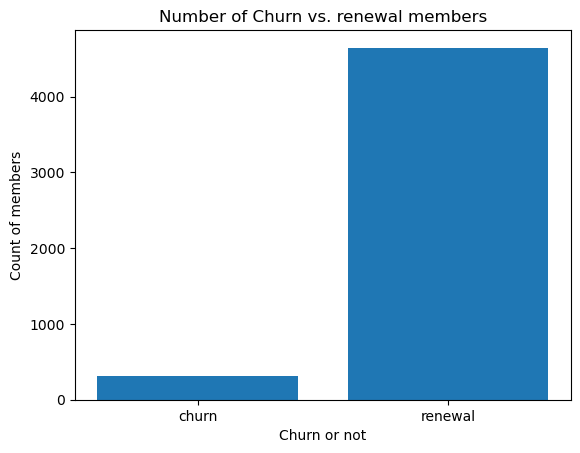

In [26]:
# bar plot for number of churn

count_churn = len(is_churn_df[(is_churn_df['is_churn'] == 1)])
count_renewal = len(is_churn_df[(is_churn_df['is_churn'] == 0)])

x = ['churn', 'renewal']
y = [count_churn, count_renewal]

plt.bar(x, y)

plt.xlabel("Churn or not")
plt.ylabel("Count of members")
plt.title("Number of Churn vs. renewal members")
plt.show()

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score


In [28]:
def plot_model_results(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(12, 5))

    # Plotting Confusion Matrix
    plt.subplot(1, 2, 1)
    sns.heatmap(cm, annot=True, fmt="d")
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('True')

    # Plotting Accuracy Score
    plt.subplot(1, 2, 2)
    plt.bar(model_name, acc)
    plt.title(f'Accuracy Score for {model_name}')
    plt.ylabel('Accuracy')

    plt.tight_layout()
    plt.show()


In [29]:
from sklearn.tree import DecisionTreeClassifier

# Creating the Decision Tree classifier
dt = DecisionTreeClassifier(random_state=42)

# Fitting the classifier to the resampled training data
dt.fit(X_resampled, y_resampled)

# Making predictions
y_pred_dt = dt.predict(X_test)

# Calculating accuracy
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f'Accuracy for Decision Tree Classifier: {accuracy_dt:.4f}')


Accuracy for Decision Tree Classifier: 0.8781


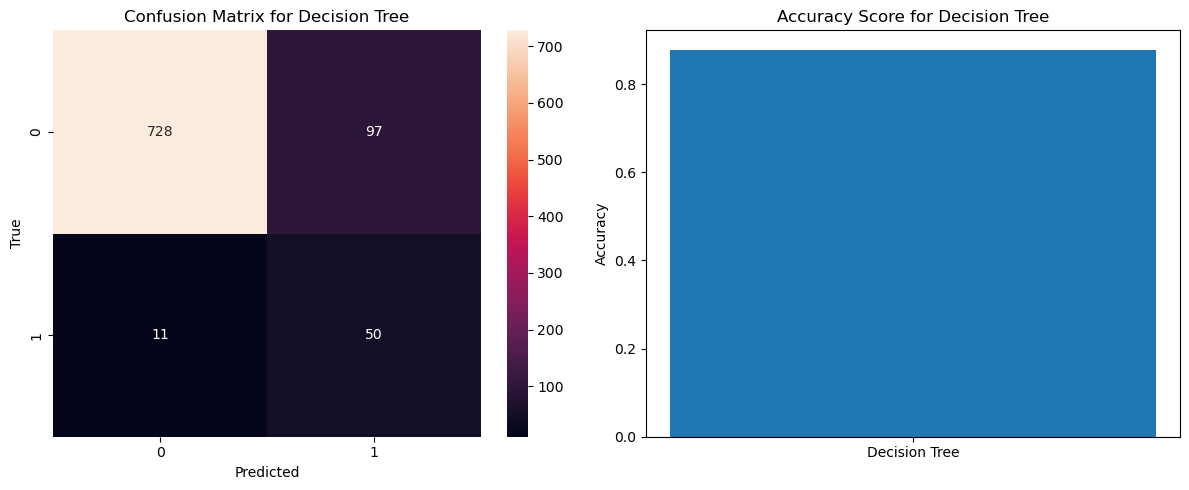

In [30]:
# For Decision Tree
plot_model_results(dt, X_test, y_test, 'Decision Tree')

In [31]:
from sklearn.ensemble import AdaBoostClassifier

# Creating the AdaBoost classifier
ab = AdaBoostClassifier(random_state=42)

# Fitting the classifier to the resampled training data
ab.fit(X_resampled, y_resampled)

# Making predictions
y_pred_ab = ab.predict(X_test)

# Calculating accuracy
accuracy_ab = accuracy_score(y_test, y_pred_ab)
print(f'Accuracy for AdaBoost Classifier: {accuracy_ab:.4f}')


Accuracy for AdaBoost Classifier: 0.9018


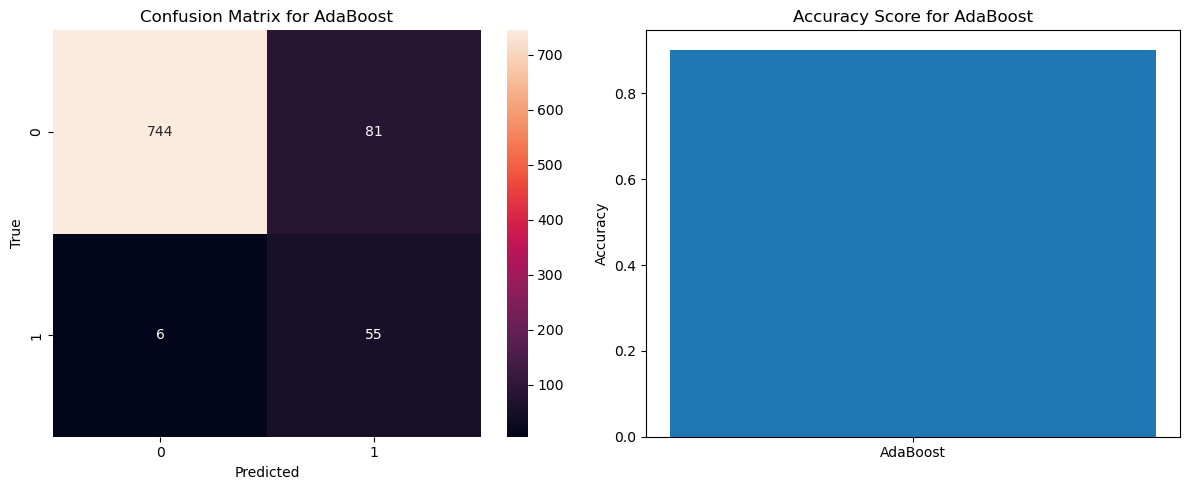

In [32]:

# For AdaBoost
plot_model_results(ab, X_test, y_test, 'AdaBoost')

In [33]:
from sklearn.neighbors import KNeighborsClassifier

# Creating the KNN classifier
knn = KNeighborsClassifier()

# Fitting the classifier to the resampled training data
knn.fit(X_resampled, y_resampled)

# Making predictions
y_pred_knn = knn.predict(X_test)

# Calculating accuracy
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f'Accuracy for KNN Classifier: {accuracy_knn:.4f}')


Accuracy for KNN Classifier: 0.6038


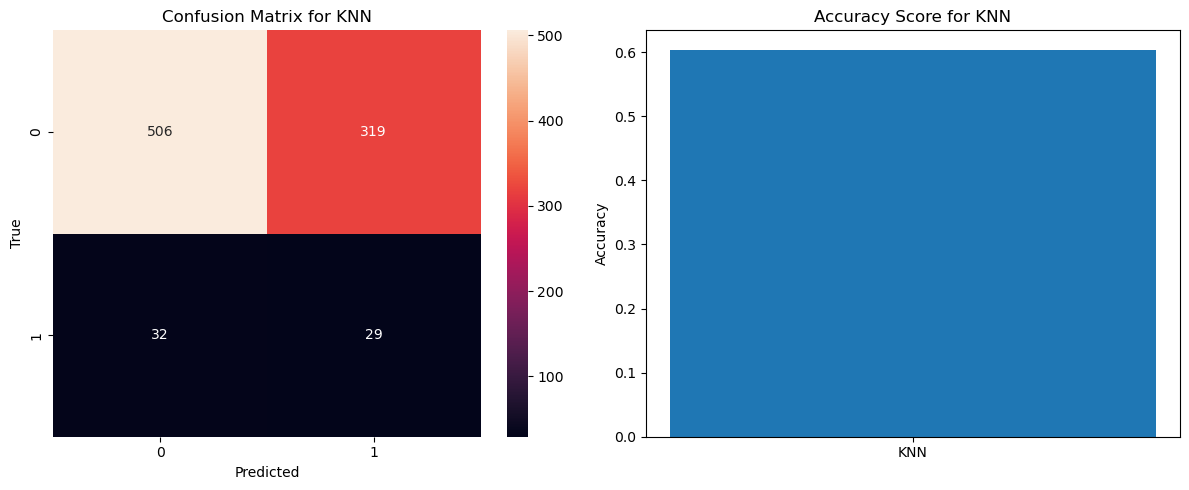

In [34]:
# For KNN
plot_model_results(knn, X_test, y_test, 'KNN')

In [ ]:
import xgboost as xgb

# Creating the XGBoost classifier
xgb_clf = xgb.XGBClassifier(random_state=42)

# Fitting the classifier to the resampled training data
xgb_clf.fit(X_resampled, y_resampled)

# Making predictions
y_pred_xgb = xgb_clf.predict(X_test)

# Calculating accuracy
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f'Accuracy for XGBoost Classifier: {accuracy_xgb:.4f}')


In [36]:
import xgboost as xgb

# creating DMatrix for train, cv, and test
train = xgb.DMatrix(X_train, label=y_train, feature_names=cols, nthread=-1)
cv = xgb.DMatrix(X_cv, label=y_cv, feature_names=cols, nthread=-1)
test = xgb.DMatrix(test_data, feature_names=cols, nthread=-1)

# setting parameters
params = {'objective' : 'binary:logistic',
          'eval_metric' : 'logloss'}

# train the xgboost model
xgb_model = xgb.train(params, train, 12, verbose_eval=True)

NameError: name 'cols' is not defined